In [1]:
#Load libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tysserand import tysserand as ty
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from PIL import Image, ImageOps
import fcsparser

from os import listdir
from os.path import isfile, join
#set up working dir

import sys
sys.path.extend([
    '../tysserand/tysserand',
    '../mosna',
])

import seaborn as sns
from time import time
import copy
from skimage import color
import matplotlib as mpl
import napari

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform

import umap
# if not installed run: conda install -c conda-forge umap-learn
import hdbscan
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from skimage import io

from scipy.stats import ttest_ind    # Welch's t-test
from scipy.stats import mannwhitneyu # Mann-Whitney rank test
from scipy.stats import ks_2samp     # Kolmogorov-Smirnov statistic

sys.path.append("/home/mouneem/mosna/")


from tysserand import tysserand as ty
from mosna import mosna
import glob
import re

2022-03-28 16:53:47.879212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mouneem/Projects/tysserand/spatial-network/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-28 16:53:47.879246: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
img_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/C2v1/'

edg_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/edg/'
coords_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/CRDS/'
nets_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/nets/'


imgs = [f for f in listdir(img_path) if isfile(join(img_path, f))]
coords = [f for f in listdir(coords_path) if isfile(join(coords_path, f))]
edges = [f for f in listdir(edg_path) if isfile(join(edg_path, f))]



In [3]:
print(len(edges))

299


In [ ]:
for fileedg in edges[5:7]:
    print(fileedg)
    filecoords = "coords."+".".join(fileedg.split(".")[1:])
    filenet = ""+".".join(fileedg.split(".")[1:])
    pattern = filenet.split("czi")[0]
    edg = pd.read_csv(edg_path + fileedg , header = None)
    crd = pd.read_csv(coords_path + filecoords , header = None)
    plt.figure(figsize=(30, 30), dpi=80)
    crd=crd.drop([0,1])
    edg=edg.drop([0,1])
    img_found = pattern+"jpg" in imgs
    if img_found:
        img = plt.imread ( img_path + pattern+"jpg")
        fig, ax = ty.showim(img, figsize=(30, 30))
    else:
        fig, ax = plt.subplots(1,1,figsize=(30, 30))
    ax.scatter(crd.iloc[:,1], crd.iloc[:,2], c ="blue")
    Xs = list(edg.iloc[:,1 ])
    Ys = list(edg.iloc[:,1 ])
    print(Xs)

    print(type(edg))
    [x0, y0], [x1, y1] = coords[edg]
    ax.plot([x0, x1], [y0, y1], c=cmap(dist), zorder=0, alpha=alpha_edges, linewidth=linewidth)

    #fig.show()
    fig.savefig(nets_path+filenet+'.png')

    
    

        



['mixmat.NVA_21-003.IMMCORE.C1v1_15T008187-08-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_17T020895-03-Z2-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_15T010760-09-Z2-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_16T013087-8-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_17T054628-06-Z1-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_16T042639-11-Z2-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_16T058343-12-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_15T034275-11-Z1-2-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_15T027584-13-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_16T037314-11-Z1-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_18T009975-12-ImvessC1-4518.csv', 'mixmat.NVA_21-003.IMMCORE.C1v1_17T003826-06-ImvessC1-4518.csv']
               Other  CD8 T-Cell       M2c    Cancer
Other       0.410977    0.211982  0.012157  0.004592
CD8 T-Cell  0.211982    0.109733  0.006922  0.002456
M2c         0.012157    0.006922  0.00164

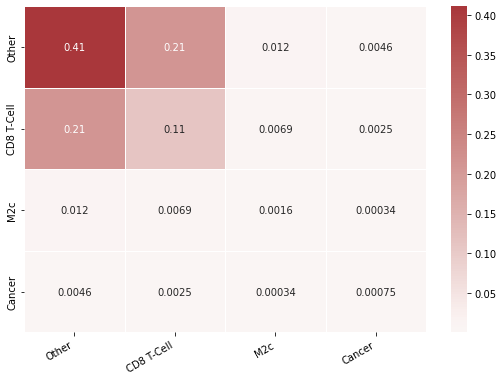

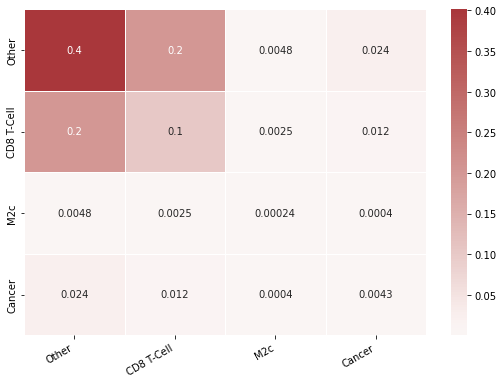

In [11]:
mosna_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/Mixmat/'
mosna_path = '/home/mouneem/tysserand/PanCK/output/'
mosna_output = str("/home/mouneem/tysserand/CORDELIER_PIERRE/mosna_output/")

mosnas = [f for f in listdir(mosna_path) if isfile(join(mosna_path, f)) and 'mixmat.NVA' in f and 'C1v1' in f ]
print(mosnas)
for mosnafile in mosnas[:2]:
    mixmat = pd.read_csv(mosna_path + mosnafile ,index_col=0 )
    print(mixmat)
    title = "Assortativity by cell types:"
    print(title)
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(mixmat, center=0, cmap="vlag", annot=True, linewidths=.5, ax=ax)
    plt.xticks(rotation=30, ha='right');
    # plt.xticks(rotation=30, ha='right', fontsize=20);
    # plt.yticks(fontsize=20);
    plt.savefig(mosna_output + mosnafile+"assortativity.png", bbox_inches='tight', facecolor='white')


In [6]:

Layer1 = '/home/mouneem/tysserand/CORDELIER_PIERRE/tummors/'
sna_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/Mixmat/'
mosna_path = '/home/mouneem/tysserand/PanCK/output/'
mosna_output = str("/home/mouneem/tysserand/CORDELIER_PIERRE/mosna_output/")

mosnas = [f for f in listdir(mosna_path) if isfile(join(mosna_path, f)) and 'mixmat.NVA' in f and 'C1v1' in f ]
##print(mosnas)
tummors = mosnas
#tummors = [ ".".join(f.split(".")[:-3])  for f in listdir(Layer1) if isfile(join(mosnas, f))]
mosnafile = mosnas[0]
print(mosnas[0])

mixmat = pd.read_csv(mosna_path + mosnas[0] ,index_col=0 )

keep = np.triu(np.ones(mixmat.shape)).astype('bool').reshape(mixmat.size)
MAT = pd.DataFrame(mixmat.stack())
MAT.to_csv('out.csv')

MAT = pd.read_csv('out.csv')
MAT.columns = ['X','Y','Value']

MAT["comb"] = MAT["X"].astype(str) + " / " + MAT["Y"].astype(str)

MAT["Value"]=(MAT["Value"]-MAT["Value"].min())/(MAT["Value"].max()-MAT["Value"].min())

MAT['sample'] = mosnafile[0]

FullMatrix = MAT

print(MAT["comb"])

for mosnafile in mosnas[0:0]:
    file = mosnafile
    print(file)

    if file in tummors:

        mixmat = pd.read_csv(mosna_path + mosnafile ,index_col=0 )

        keep = np.triu(np.ones(mixmat.shape)).astype('bool').reshape(mixmat.size)
        MAT = pd.DataFrame(mixmat.stack())
        MAT.to_csv('out.csv')

        MAT = pd.read_csv('out.csv')
        MAT.columns = ['X','Y','Value']



        MAT["comb"] = MAT["X"].astype(str) + " / " + MAT["Y"].astype(str)
        
        MAT["Value"]=(MAT["Value"]-MAT["Value"].min())/(MAT["Value"].max()-MAT["Value"].min())

        MAT['sample'] = file
        print(MAT)
        FullMatrix = FullMatrix.append(pd.DataFrame(data = MAT))


print(FullMatrix)


FullMatrix.to_csv('FullMatrix_C1.csv')



mixmat.NVA_21-003.IMMCORE.C1v1_18T047929-09-Z1-ImvessC1-4518.csv
0     Other / Other
1        Other / M2
2       Other / M2c
3        Other / M1
4        M2 / Other
5           M2 / M2
6          M2 / M2c
7           M2 / M1
8       M2c / Other
9          M2c / M2
10        M2c / M2c
11         M2c / M1
12       M1 / Other
13          M1 / M2
14         M1 / M2c
15          M1 / M1
Name: comb, dtype: object
        X      Y     Value           comb sample
0   Other  Other  1.000000  Other / Other      m
1   Other     M2  0.509483     Other / M2      m
2   Other    M2c  0.019715    Other / M2c      m
3   Other     M1  0.013912     Other / M1      m
4      M2  Other  0.509483     M2 / Other      m
5      M2     M2  0.259855        M2 / M2      m
6      M2    M2c  0.010289       M2 / M2c      m
7      M2     M1  0.006971        M2 / M1      m
8     M2c  Other  0.019715    M2c / Other      m
9     M2c     M2  0.010289       M2c / M2      m
10    M2c    M2c  0.001012      M2c / M2c      m
1

In [5]:
# remove duplicates

FullMatrix

,Value,comb,sample
"(m,)",0.509483,M2 / Other,m
"(m,)",0.019715,M2c / Other,m
"(m,)",0.010289,M2c / M2,m
"(m,)",0.013912,M1 / Other,m
"(m,)",0.006971,M1 / M2,m
...,...,...,...
"(mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2-ImvessC1-4518.csv,)",0.018524,M2c / M2,mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2...
"(mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2-ImvessC1-4518.csv,)",0.028873,M2c / Other,mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2...
"(mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2-ImvessC1-4518.csv,)",0.025943,M1 / M2,mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2...
"(mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2-ImvessC1-4518.csv,)",0.041369,M1 / Other,mixmat.NVA_21-003.IMMCORE.C1v1_17T048267-11-Z2...


<AxesSubplot:xlabel='comb', ylabel='sample'>

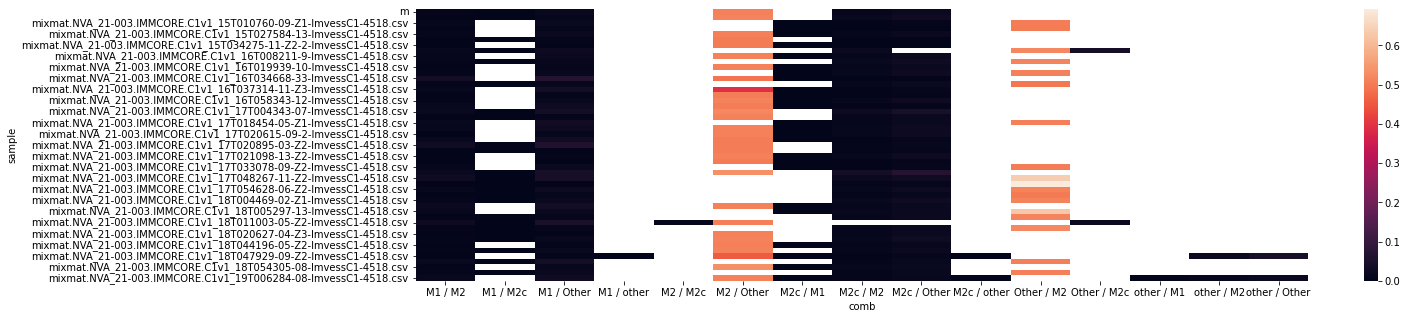

In [4]:
FullMatrix = FullMatrix[['Value', 'comb', 'sample']]
FullMatrix.index = FullMatrix[['sample']]

Matrix = FullMatrix.pivot_table(index=["sample"], 
                    columns='comb', 
                    values='Value')

plt.figure(figsize=(20, 5))

sns.heatmap(Matrix)


ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1440x360 with 0 Axes>

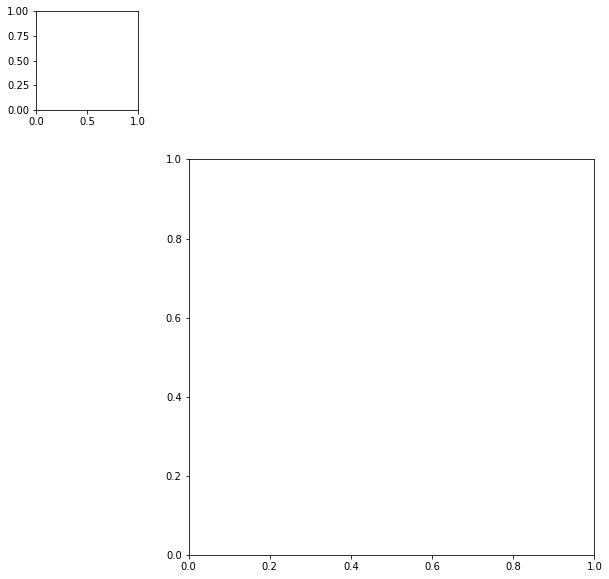

In [36]:
plt.figure(figsize=(20, 5))
sns.clustermap(Matrix, yticklabels=False, center = 0, z_score =1)
